<a href="https://colab.research.google.com/github/shams-mehdi/basic_algo/blob/main/Free_Energy_plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-41-72e8f555bd69>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  h0=ax1.contourf(RC_G.transpose(),levels=tickz,extent=[RC_xbins[0],RC_xbins[-1],RC_ybins[0],RC_ybins[-1]],cmap=(plt.cm.get_cmap(CMAP)).reversed())


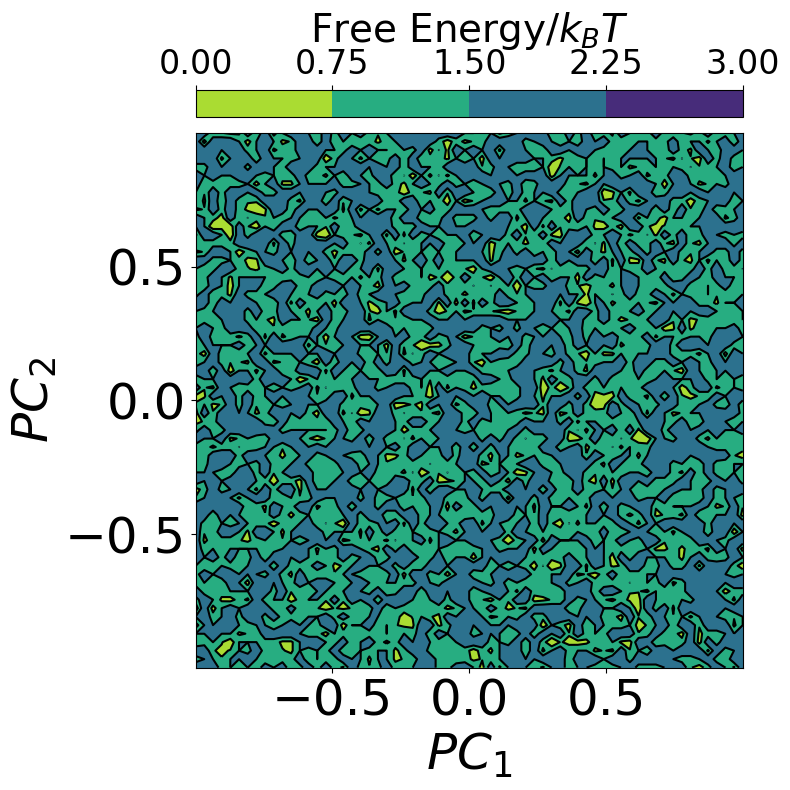

In [41]:
def visualizer_multi(data, res_bin, weights, CMAP, tick_max):
  import numpy as np
  import matplotlib
  import matplotlib.pyplot as plt
  from matplotlib import colors as c
  from mpl_toolkits.axes_grid1 import make_axes_locatable

  fig, ax1 = plt.subplots(figsize=(8,8))
  fig2,ax6 = plt.subplots()

  RC_counts,RC_xbins,RC_ybins,images = ax6.hist2d(data[:,0],data[:,1],bins=res_bin, weights = weights)
  RC_counts[RC_counts==0]=RC_counts[RC_counts!=0].min()
  RC_G=-np.log(RC_counts)
  RC_G=RC_G-np.nanmin(RC_G)
  plt.close(fig2)

  tickz = np.linspace(0,tick_max,5)
  h0=ax1.contourf(RC_G.transpose(),levels=tickz,extent=[RC_xbins[0],RC_xbins[-1],RC_ybins[0],RC_ybins[-1]],cmap=(plt.cm.get_cmap(CMAP)).reversed())
  h1=ax1.contour(h0,colors='k')
  divider = make_axes_locatable(ax1)
  cax = divider.append_axes("top", "5%", pad="3%")
  cb1 = fig.colorbar(h0, cax=cax, orientation="horizontal", ticks = tickz)
  cb1.set_ticks(tickz)
  cb1.set_label(r'Free Energy$/k_BT$',fontsize=28)
  cax.xaxis.set_ticks_position("top")
  cax.xaxis.set_label_position("top")
  ax1.set_xlabel(r'$PC_1$', fontsize = 36)
  ax1.set_ylabel(r'$PC_2$', fontsize = 36)
  ax1.tick_params(axis='both', which='major', labelsize=36)
  ax1.tick_params(axis='both', which='minor', labelsize=8)
  cb1.ax.tick_params(labelsize=24)
  fig.tight_layout()
  fig.savefig('./free_energy_plot.jpg', dpi=300)

import numpy as np
data = np.random.uniform(-1,1,(10000,2)) ## Two-dimensional array of data
tick_max = 3 ## Maximum of the free energy that should be plotted
bin_resolution = 64 ## Resolution of the 2-d bins
weight_matrix = np.ones((10000)) ## One-dimensional array. For unweighted data, pass an array of one's
CMAP = 'viridis' ## Matplotlib colormap

visualizer_multi(data, bin_resolution, weight_matrix, CMAP, tick_max)